# TensorFlow Basics - Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([-0.7563875 , -0.72647612, -0.61644767, ...,  0.21219835,
        0.08570454, -0.75370167])

y = mx + b

b = 5

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [9]:
y_df.head()

,Y
0,4.243612
1,4.273529
2,4.383562
3,5.094512
4,5.267063


In [10]:
my_data = pd.concat([x_df, y_df], axis=1)

In [11]:
my_data

,X Data,Y
0,0.00000,4.243612
1,0.00001,4.273529
2,0.00002,4.383562
3,0.00003,5.094512
4,0.00004,5.267063
5,0.00005,3.426050
6,0.00006,4.943683
7,0.00007,5.535927
8,0.00008,4.722187
9,0.00009,4.331160


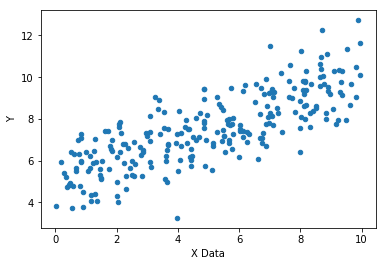

In [12]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [13]:
batch_size = 8

In [14]:
np.random.randn(2)

array([-1.19953642, -0.1565359 ])

In [15]:
m = tf.Variable(1.5)

In [16]:
b = tf.Variable(-0.59)

In [17]:
xph = tf.placeholder(tf.float32, [batch_size])

In [18]:
yph = tf.placeholder(tf.float32, [batch_size])

In [19]:
y_model = m * xph + b

In [20]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [24]:
model_m

0.55254447

In [25]:
model_b

4.8966231

In [26]:
y_hat = x_data * model_m + model_b

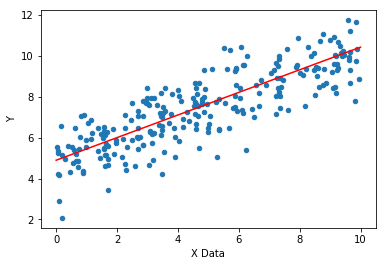

In [27]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

In [28]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [29]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_model_dir': 'C:\\Users\\wfsoc\\AppData\\Local\\Temp\\tmp9hcpw0k0', '_save_checkpoints_secs': 600, '_log_step_count_steps': 100}


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [32]:
# training set is 70% of the data
print(x_train.shape)

(700000,)


In [33]:
# eval set is 30% of the data
x_eval.shape

(300000,)

In [34]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [35]:
# this is going to be used for evaluation too
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [42]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [37]:
# train the estimator
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\wfsoc\AppData\Local\Temp\tmp9hcpw0k0\model.ckpt.
INFO:tensorflow:step = 1, loss = 499.704
INFO:tensorflow:global_step/sec: 819.664
INFO:tensorflow:step = 101, loss = 32.1743 (0.124 sec)
INFO:tensorflow:global_step/sec: 819.671
INFO:tensorflow:step = 201, loss = 15.6449 (0.122 sec)
INFO:tensorflow:global_step/sec: 970.859
INFO:tensorflow:step = 301, loss = 26.1001 (0.103 sec)
INFO:tensorflow:global_step/sec: 1030.98
INFO:tensorflow:step = 401, loss = 12.6877 (0.098 sec)
INFO:tensorflow:global_step/sec: 1030.91
INFO:tensorflow:step = 501, loss = 18.1297 (0.097 sec)
INFO:tensorflow:global_step/sec: 970.825
INFO:tensorflow:step = 601, loss = 6.99085 (0.101 sec)
INFO:tensorflow:global_step/sec: 990.122
INFO:tensorflow:step = 701, loss = 9.73239 (0.104 sec)
INFO:tensorflow:global_step/sec: 869.581
INFO:tensorflow:step = 801, loss = 3.97346 (0.113 sec)
INFO:tensorflow:global_step/sec: 1030.94
IN

In [39]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2020-01-11-23:42:14
INFO:tensorflow:Restoring parameters from C:\Users\wfsoc\AppData\Local\Temp\tmp9hcpw0k0\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [43]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2020-01-11-23:43:11
INFO:tensorflow:Restoring parameters from C:\Users\wfsoc\AppData\Local\Temp\tmp9hcpw0k0\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [44]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.11239, 'global_step': 1000, 'loss': 8.8991203}


In [45]:
print ('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0839304, 'global_step': 1000, 'loss': 8.671443}


In [46]:
brand_new_data = np.linspace(0, 10, 10)

In [47]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [49]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\wfsoc\AppData\Local\Temp\tmp9hcpw0k0\model.ckpt-1000


[{'predictions': array([ 4.39281416], dtype=float32)},
 {'predictions': array([ 5.04248285], dtype=float32)},
 {'predictions': array([ 5.69215202], dtype=float32)},
 {'predictions': array([ 6.34182072], dtype=float32)},
 {'predictions': array([ 6.99148941], dtype=float32)},
 {'predictions': array([ 7.6411581], dtype=float32)},
 {'predictions': array([ 8.2908268], dtype=float32)},
 {'predictions': array([ 8.94049549], dtype=float32)},
 {'predictions': array([ 9.59016418], dtype=float32)},
 {'predictions': array([ 10.23983383], dtype=float32)}]

In [50]:
predictions = []

for pred in estimator.predict(input_fn_predict):
    predictions.append(pred['predictions'])
    

INFO:tensorflow:Restoring parameters from C:\Users\wfsoc\AppData\Local\Temp\tmp9hcpw0k0\model.ckpt-1000


In [51]:
predictions

[array([ 4.39281416], dtype=float32),
 array([ 5.04248285], dtype=float32),
 array([ 5.69215202], dtype=float32),
 array([ 6.34182072], dtype=float32),
 array([ 6.99148941], dtype=float32),
 array([ 7.6411581], dtype=float32),
 array([ 8.2908268], dtype=float32),
 array([ 8.94049549], dtype=float32),
 array([ 9.59016418], dtype=float32),
 array([ 10.23983383], dtype=float32)]

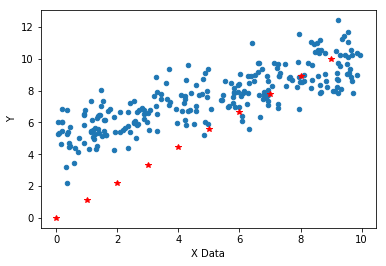

In [54]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, 'r*')